### Fraud Detection:

##### Importing Libraries:

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

##### Uploading and understanding data:

In [30]:
data = pd.read_csv('creditcard.csv')
print('data lenght:',len(data))
data.head()

data lenght: 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fraud % percentage in the data: 0.173


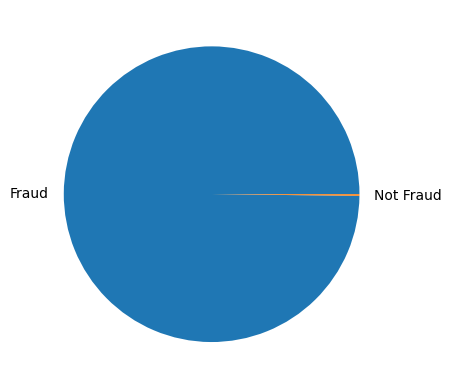

In [31]:
fig, ax = plt.subplots()
labels = 'Fraud','Not Fraud'
classes = data['Class'].value_counts()
ax.pie(data['Class'].value_counts(), labels=labels)
print('Fraud % percentage in the data:',round((classes[1]/len(data))*100,3))

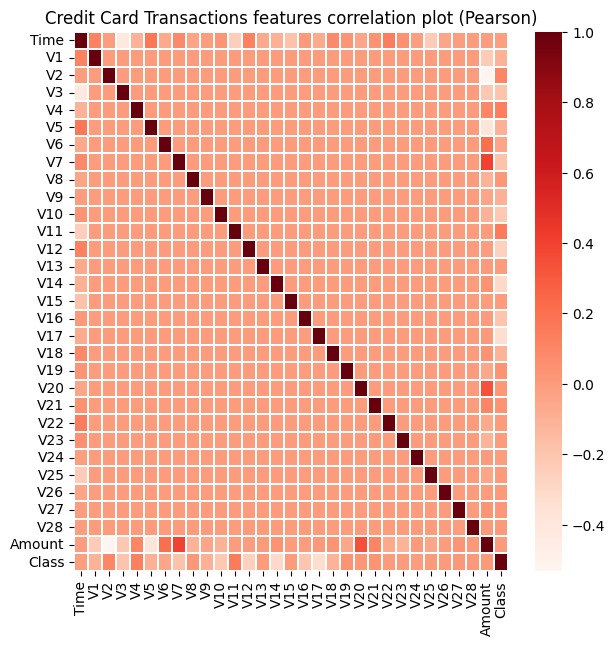

In [32]:
plt.figure(figsize = (7,7))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

It seems like feauters doesnt have significant correlation with theirselves but amount,time and classes have strong correlation.

Text(0.5, 1.0, 'Time(hours) vs Amount of transactions')

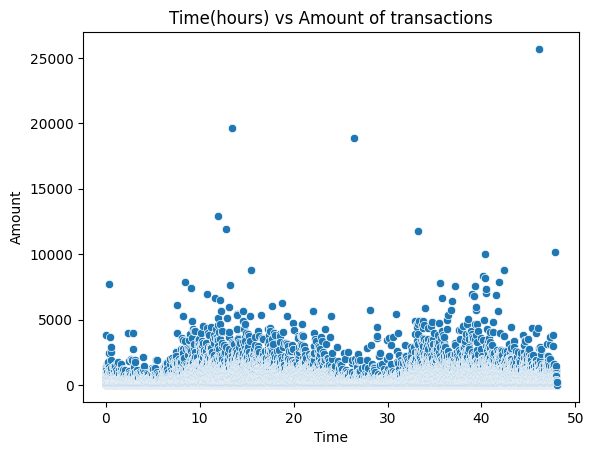

In [33]:
sns.scatterplot(y=data['Amount'],x=data['Time']/3600).set_title('Time(hours) vs Amount of transactions')

##### Scale and Split:

As we see above in our data there we have feauters that scaled and amount/time columns unscaled. With that we dont see the correlation between them. For our model we need to scale these columns and make 50/50 fraud/non-fraud classed dataset to train our data. Purpose of this is we want a certain model that cathces frauds well. It will be way harder with 0.17% class difference because of overfitting.

In [34]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
rob_scaler = RobustScaler() # Unlikely ıt uses median isnted of mean of data.
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [42]:
data = data.sample(frac=1) #Shuffles data

fraud = data.loc[data['Class'] == 1]
non_fraud = data.loc[data['Class'] == 0][:492]

normal_dist = pd.concat([fraud,non_fraud])
new_data = normal_dist.sample(frac=1,random_state=31)
new_data.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
201601,1.512052,0.578790,0.523820,1.531708,-4.176390,3.584615,-1.023954,-0.502471,-1.891966,0.878417,...,0.621804,0.851859,1.176927,0.453553,0.485211,-0.500687,-0.108284,0.269477,-0.063245,1
144846,-0.160973,0.020512,-2.757487,3.503597,-2.905394,0.931806,-0.243227,-0.674687,-0.464777,2.111775,...,0.091747,0.165808,0.365448,-0.001040,0.576916,0.335626,-0.397919,0.253684,0.192517,0
162556,-0.057291,0.358545,-0.694980,0.247120,2.074755,-0.017298,-0.215007,-0.235263,-0.037201,0.164253,...,0.114871,0.220919,0.645922,-0.408868,-0.055975,0.384300,1.057126,0.010678,0.062933,0
42856,2.110948,-0.510098,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,...,-1.009320,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,1
9035,-0.293440,-0.846991,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1


1    492
0    492
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

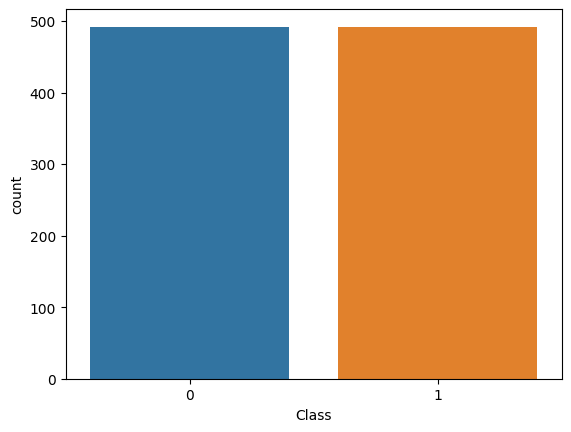

In [45]:
print(new_data.Class.value_counts())
sns.countplot(new_data,x='Class')

##### Correlation Matrices:

<Axes: >

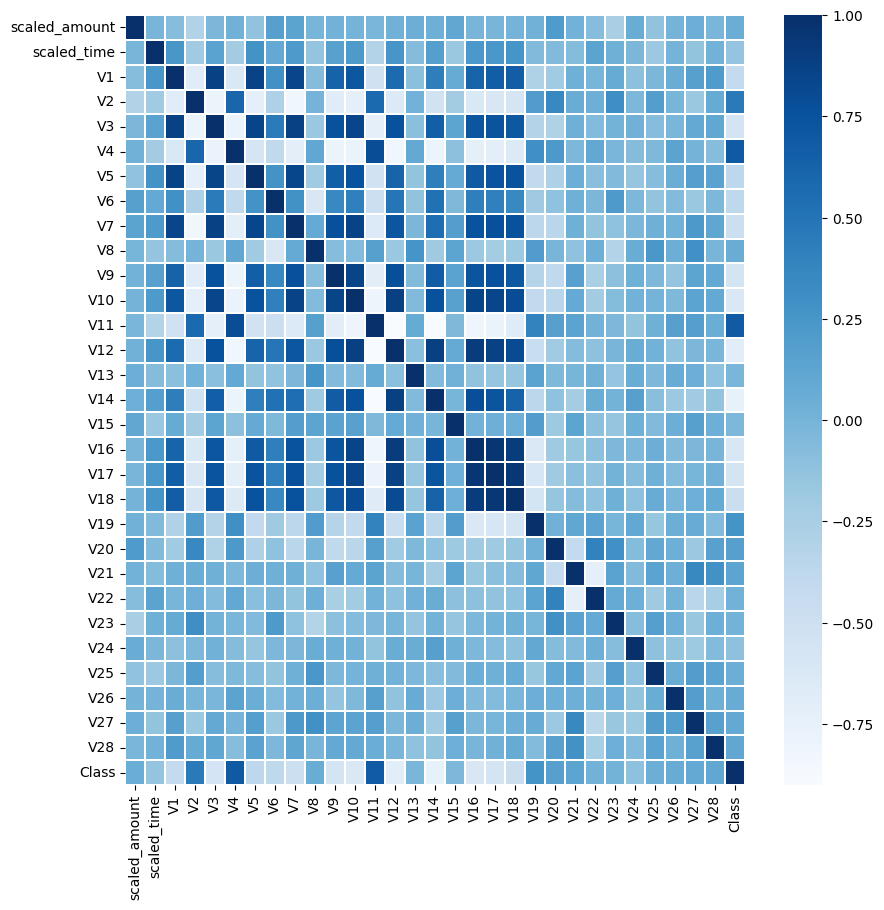

In [49]:
plt.figure(figsize = (10,10))
corr = new_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")

Positive Correlations:V2,V4 and V11 has high correlation with classes.<p>
Negative Correlations:V10,V12,V14 and V16 has low correlation with classes.<p>

<Axes: xlabel='Class', ylabel='V11'>

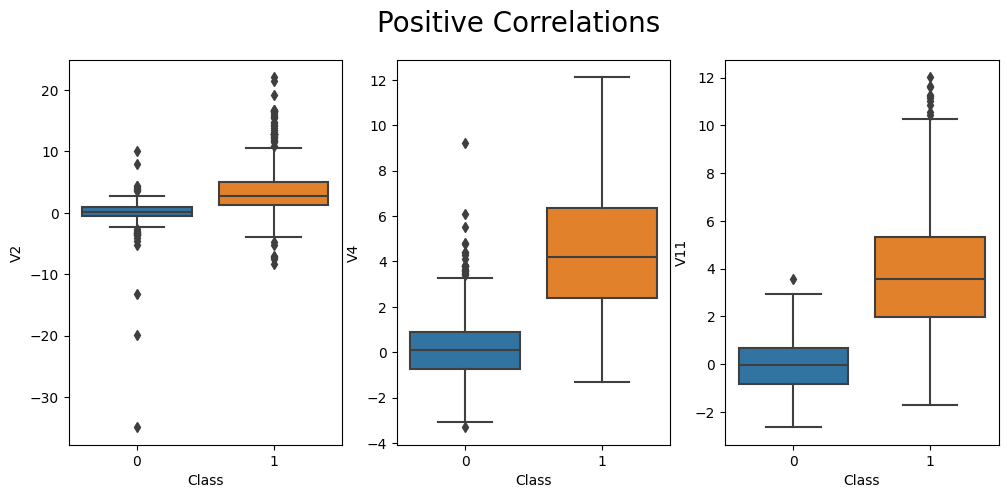

In [57]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
fig.suptitle('Positive Correlations', fontsize=20)
sns.boxplot(new_data,x='Class',y='V2',ax=ax[0])
sns.boxplot(new_data,x='Class',y='V4',ax=ax[1])
sns.boxplot(new_data,x='Class',y='V11',ax=ax[2])

<Axes: xlabel='Class', ylabel='V16'>

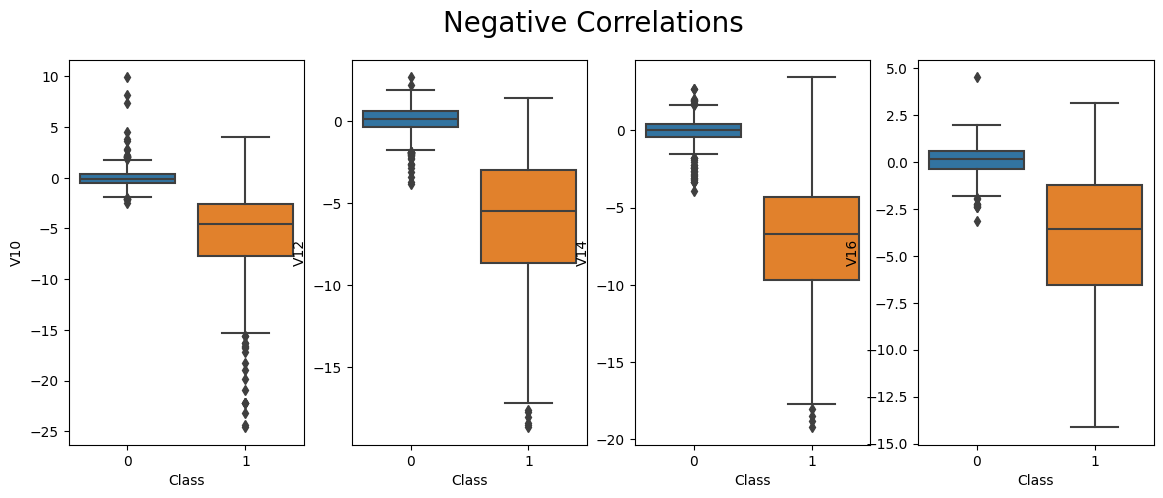

In [59]:
fig, ax = plt.subplots(1,4,figsize=(14,5))
fig.suptitle('Negative Correlations', fontsize=20)
sns.boxplot(new_data,x='Class',y='V10',ax=ax[0])
sns.boxplot(new_data,x='Class',y='V12',ax=ax[1])
sns.boxplot(new_data,x='Class',y='V14',ax=ax[2])
sns.boxplot(new_data,x='Class',y='V16',ax=ax[3])

##### Dimensionality reduction and Clustering:

To showcase clustering we need to reduce dimensions to plot them on 2d surface. We will use T-SNE and PCA for dimensionailty reduction.

In [61]:
# New_df is from the random undersample data (fewer instances)
y = new_data['Class']
X = new_data.drop('Class', axis=1)


X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

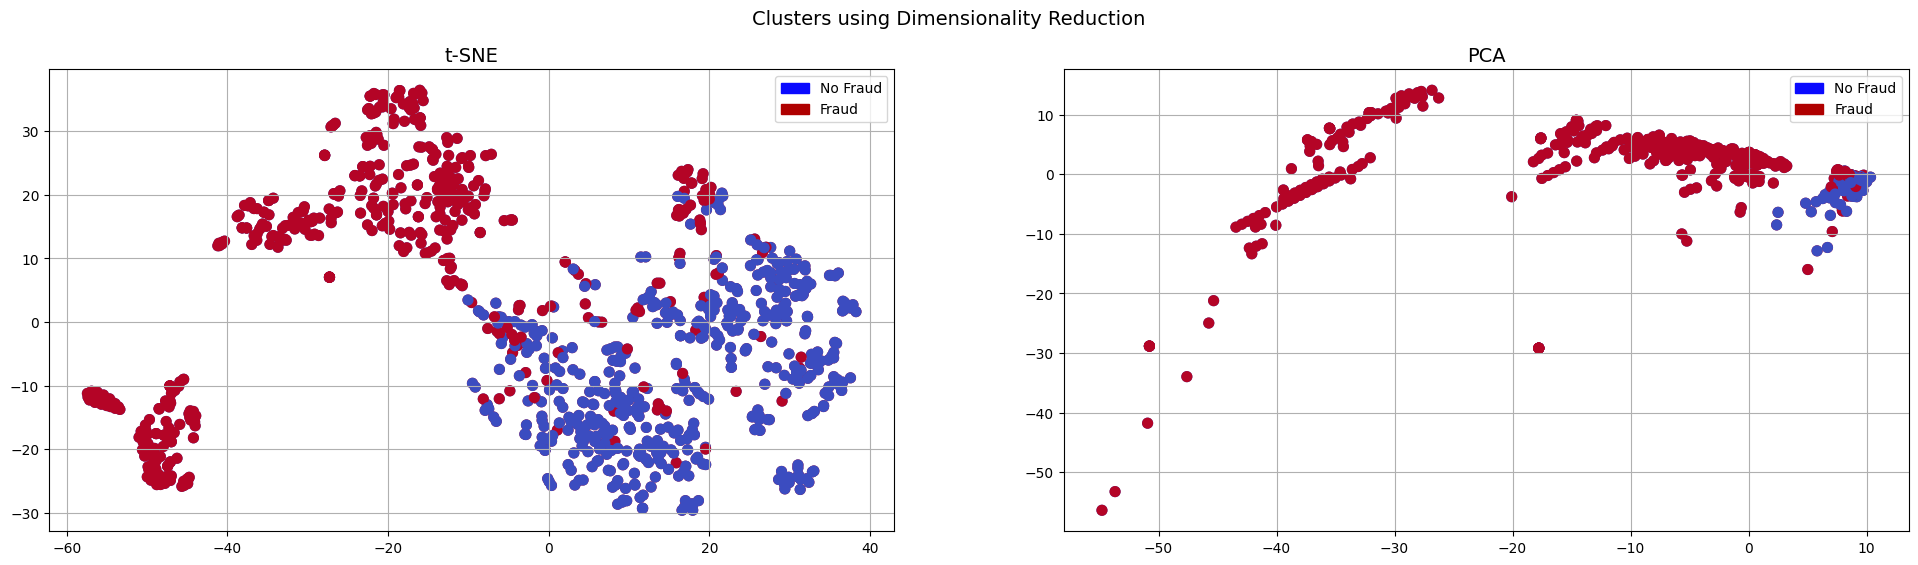

In [63]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

##### Models and Classifiers:

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [69]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


We get the best resault with logistic regression